In [2]:
import ee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ee.Initialize()

from datetime import datetime
import time

In [81]:
ft = ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/CA").first())
def red(im):
    x = im.reduceRegion(reducer=ee.Reducer.mean(), geometry=ft.geometry())
    f = ee.Feature(ee.Geometry.Point([0,0]), x)
    return f

vals = []
dates = []
for year in range(2000, 2018):
    ys = str(year)
    ys1 = str(year+1)
    evap = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').select('Evap_tavg').filterDate(ys+'-01-01', ys1+'-01-01')
    x = evap.map(red).getInfo()
    for feat in x['features']:
        vals.append(feat['properties']['Evap_tavg']*10800)
        d = feat['id']
        yr = d[1:5]
        mon = d[5:7]
        day = d[7:9]
        hr = d[-4:]
        datestr = '%s-%s-%s %s'%(yr, mon, day, hr)
        dates.append(pd.to_datetime(datestr))
    
df = pd.DataFrame(vals, index=dates, columns=['et-mm']).resample('D').sum()

KeyboardInterrupt: 

In [82]:
df = pd.DataFrame(vals, index=dates, columns=['et-mm']).resample('D').sum()

In [84]:
df

et-mm
2000-01-02  0.092696
2000-01-03  0.165183
2000-01-04  0.201976
2000-01-05  0.272495
2000-01-06  0.276311
2000-01-07  0.278691
2000-01-08  0.236996
2000-01-09  0.239207
2000-01-10  0.160092
2000-01-11  0.166728
2000-01-12  0.245989
2000-01-13  0.243990
2000-01-14  0.195262
2000-01-15  0.350691
2000-01-16  0.626098
2000-01-17  0.430573
2000-01-18  0.372797
2000-01-19  0.257781
2000-01-20  0.303000
2000-01-21  0.396179
2000-01-22  0.442858
2000-01-23  0.461115
2000-01-24  0.352869
2000-01-25  0.371208
2000-01-26  0.482493
2000-01-27  0.484273
2000-01-28  0.508674
2000-01-29  0.535246
2000-01-30  0.713371
2000-01-31  0.523496
...              ...
2002-12-01  0.435284
2002-12-02  0.430373
2002-12-03  0.411277
2002-12-04  0.391071
2002-12-05  0.485997
2002-12-06  0.654358
2002-12-07  0.515802
2002-12-08  0.600282
2002-12-09  0.742931
2002-12-10  0.395164
2002-12-11  0.459101
2002-12-12  0.552165
2002-12-13  0.743101
2002-12-14  0.831894
2002-12-15  1.102321
2002-12-16  0.862214
2002-12-17  0.632146
2002-12-18  0.646108
2002-12-19  0.899134
2002-12-20  0.546615
2002-12-21  0.408933
2002-12-22  0.628172
2002-12-23  0.636959
2002-12-24  0.436318
2002-12-25  0.441448
2002-12-26  0.471630
2002-12-27  0.370381
2002-12-28  0.595411
2002-12-29  0.642106
2002-12-30  0.530718

[1094 rows x 1 columns]

In [14]:
# load features
fts = [ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/CA").first()), 
#        ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/delta").first()),
#        ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/napa_ava").first()),
#        ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/imperial_valley").first()),
#        ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/oak_savanna").first()),
#        ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/sonoma_ava").first()),
#        ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/san_joaquin").first()),
#        ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/central_valley").first()),
      ]

# names = ['California','Delta', 'Napa', 'Imperial Valley', 'Oak Savanna', 'Sonoma', 'San Joaquin', 'Central Valley']
names = ['California']
fts = [fts[i].set('Site', names[i]) for i in range(len(fts))]
dfs = []
for i,ft in enumerate(fts):
    et_ft = evap.reduceRegion(reducer=ee.Reducer.mean(), geometry=ft.geometry(), maxPixels=1e13).getInfo()
    bands = [item for item in et_ft.keys()]
    datelist = [pd.to_datetime(band[1:]) for band in bands]
    vals = [item for item in et_ft.values()]
    temp = pd.DataFrame.from_dict({'Site':names[i], 'ET':vals})
    temp.index = datelist
    temp = temp.sort_index()
    dfs.append(temp)
    
df_long = pd.concat(dfs)
df = df_long.pivot(columns='Site', values='ET')
# f, ax = plt.subplots(1, figsize=(8,4))
# df.plot(ax=ax)
# ax.set_ylabel('ET [mm/month]')
# df.to_csv('../data/et_regions_2001-2017.csv')

AttributeError: 'ImageCollection' object has no attribute 'reduceRegion'

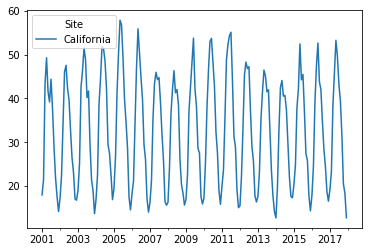

In [13]:
df.plot()

In [39]:
toSample = npp
whatToSample = 'annualNPP'
scl = 500
mult = 0.0001
regions = dry
regions = regions.map( 
  lambda f: f.set('region', f.id()))
triplets = toSample.map(lambda image: image.select(whatToSample)
                        .reduceRegions(collection=regions.select('region'), reducer=ee.Reducer.mean(), scale=scl)
                        .map(lambda f: f.set('time', image.get('system:time_start')))).flatten().getInfo()

vals = [mult*item['properties']['mean'] for item in list(triplets['features'])]

print('........Dry Creek........')
print('Mean %.4f'%np.mean(vals))
print('std %.4f'%np.std(vals))

........Dry Creek........
Mean 0.6096
std 0.0379


In [38]:
toSample = npp
whatToSample = 'annualNPP'
scl = 500
mult = 0.0001
regions = elder
regions = regions.map( 
  lambda f: f.set('region', f.id()))
triplets = toSample.map(lambda image: image.select(whatToSample)
                        .reduceRegions(collection=regions.select('region'), reducer=ee.Reducer.mean(), scale=scl)
                        .map(lambda f: f.set('time', image.get('system:time_start')))).flatten().getInfo()

vals = [mult*item['properties']['mean'] for item in list(triplets['features'])]

print('........Elder Creek........')
print('Mean %.4f'%np.mean(vals))
print('std %.4f'%np.std(vals))

........Elder Creek........
Mean 1.2119
std 0.0643
